In [1]:
import math
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
from scipy.stats import rankdata
from sklearn.preprocessing import normalize
from math import log
import random
from cdlib import algorithms
from scipy.special import logit as logit
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
from networkx.algorithms.community import k_clique_communities,label_propagation_communities, asyn_lpa_communities,greedy_modularity_communities
from networkx.algorithms.centrality import *
from networkx.algorithms.cluster import *
# import igraph as ig

from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clinical_231_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_231_data.csv'
mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231_sort_with_sensitive.csv'
id_symbol_lookup_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\Hugo_Symbol_to_id.csv'
filterd_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_133_genes_data.csv'

In [2]:
df = pd.read_csv(filterd_data).drop(columns = ['Hugo_ID']).T
correlations = np.corrcoef(df, df)[:231, :231]
for i in range(correlations.shape[0]):
    correlations[i][i]=0
# for i in range(correlations.shape[0]):
#     for j in range(correlations.shape[0]):
#         if correlations[i][j] < 0:
#             correlations[i][j]  = -correlations[i][j] 
            
ex_df = pd.DataFrame(correlations)

G = nx.Graph()
G.add_nodes_from(np.arange(133))
G.nodes()
for i in range(correlations.shape[0]-1):
    for j in range(i+1,correlations.shape[0]):
        G.add_edge(i, j, weight=correlations[i][j])
#         print(correlations[i][j])
df = pd.DataFrame()
de = G.degree(weight='weight')
b = betweenness_centrality(G,weight = 'weight')
# print(b)
e = eigenvector_centrality(G,weight = 'weight')
# print(e)
i = information_centrality(G,weight = 'weight')
# print(i)
# cc = nx.clustering(G,weight='weight')
df['degree'] = np.array(de).T[1][:]
# df['clustering_coef'] = cc.values()
df['betweenness'] = b.values()
df['eigenvector'] = e.values()
df['closeness'] = i.values()
df.round(3)

# df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\patient_net_features.csv")

In [3]:
df = pd.read_csv(filterd_data)
df = df.drop(columns = ['Hugo_ID'])
cancer_types =  [0]*117+[1]*74+[2]*40
print(len(cancer_types))
# sns.countplot(x = 'Hugo_ID', data=df)


# df['cancer'] = cancer_types

correlations = np.corrcoef(df, df)[:133, :133]

for i in range(correlations.shape[0]):
    correlations[i][i]=0
for i in range(correlations.shape[0]):
    for j in range(correlations.shape[0]):
        if correlations[i][j] < 0:
            correlations[i][j]  = -correlations[i][j] 
#         if correlations[i][j] < 0.2:
#             correlations[i][j]  = 0
#         correlations[i][j] = math.floor(correlations[i][j]*100)
correlations # weighted network matrix
# ex_df = pd.DataFrame(correlations)
# ex_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\network_matrix.csv")
# np_pos = np.zeros((133,133))
# np_neg = np.zeros((133,133))
# for i in range(correlations.shape[0]):
#     for j in range(correlations.shape[0]):
#         if correlations[i][j] > 0:
#             np_pos[i][j] = correlations[i][j] 
#         if correlations[i][j] < 0:
#             np_neg[i][j] = -correlations[i][j] 
# ex_df = pd.DataFrame(np_pos)
# ex_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\network_matrix_pos.csv")
# ex_df = pd.DataFrame(np_neg)
# ex_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\network_matrix_abs.csv")

231


array([[0.        , 0.74065188, 0.50100018, ..., 0.01460397, 0.23895306,
        0.01588378],
       [0.74065188, 0.        , 0.17325192, ..., 0.0707046 , 0.17785555,
        0.04636617],
       [0.50100018, 0.17325192, 0.        , ..., 0.00584516, 0.44585732,
        0.00200516],
       ...,
       [0.01460397, 0.0707046 , 0.00584516, ..., 0.        , 0.23463521,
        0.29402463],
       [0.23895306, 0.17785555, 0.44585732, ..., 0.23463521, 0.        ,
        0.45071698],
       [0.01588378, 0.04636617, 0.00200516, ..., 0.29402463, 0.45071698,
        0.        ]])

In [5]:

G = nx.Graph()
G.add_nodes_from(np.arange(133))
G.nodes()
for i in range(correlations.shape[0]-1):
    for j in range(i+1,correlations.shape[0]):
        G.add_edge(i, j, weight=correlations[i][j])
#         print(correlations[i][j])
        

G.number_of_nodes()

133

In [36]:
# ccc = asyn_lpa_communities(G,weight='weight')
# next(ccc)
# greedy_modularity_communities(G,weight='weight' )


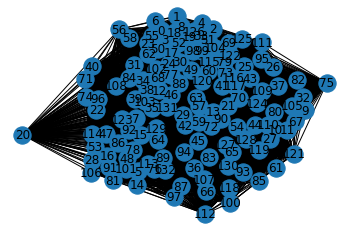

In [6]:

plt.subplot()
nx.draw(G, with_labels=True)
plt.show()

In [20]:

wc = algorithms.wCommunity(G, min_bel_degree=0.99999, threshold_bel_degree=0.99999, weightName='weight')

# wc
wc.to_json()
wc = algorithms.louvain(G,weight='weight',resolution=0.5)
print(wc.to_node_community_map())
print("--------------")
ccc = asyn_lpa_communities(G,weight='weight')
print(len(next(ccc)))
print("--------------")
gmc = greedy_modularity_communities(G,weight='weight' )
print(gmc)
print("--------------")
bp = community_louvain.best_partition(G,weight='weight', resolution=0.5)
print(bp)

'{"communities": [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]], "algorithm": "wCommunity", "params": {"min_bel_degree": 0.99999, "threshold_bel_degree": 0.99999, "weightName": "weight"}, "overlap": true, "coverage": 1.0}'

In [4]:
df = pd.DataFrame()
de = G.degree(weight='weight')
b = betweenness_centrality(G,weight = 'weight')
# print(b)
e = eigenvector_centrality(G,weight = 'weight')
# print(e)
i = information_centrality(G,weight = 'weight')
# print(i)
cc = nx.clustering(G,weight='weight')
df['degree'] = np.array(de).T[1][:]
df['clustering_coef'] = cc.values()
df['betweenness'] = b.values()
df['eigenvector'] = e.values()
df['closeness'] = i.values()
df.round(3)

,degree,clustering_coef,betweenness,eigenvector,closeness
0,37.068,0.185,0.107,0.128,0.104
1,25.771,0.153,0.000,0.086,0.090
2,36.064,0.182,0.006,0.128,0.103
3,35.926,0.183,0.000,0.125,0.103
4,35.315,0.181,0.000,0.125,0.102
...,...,...,...,...,...
128,25.487,0.138,0.023,0.052,0.089
129,31.071,0.172,0.012,0.073,0.097
130,17.225,0.112,0.015,0.034,0.073
131,36.866,0.211,0.000,0.102,0.104


In [5]:
df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\network_features_133.csv")
df

,degree,clustering_coef,betweenness,eigenvector,closeness
0,37.068241,0.185392,0.107449,0.128421,0.104133
1,25.770810,0.152595,0.000000,0.086084,0.089725
2,36.063570,0.181958,0.006130,0.128194,0.102997
3,35.926064,0.182528,0.000000,0.125222,0.102907
4,35.315217,0.181160,0.000000,0.124995,0.102200
...,...,...,...,...,...
128,25.487240,0.138486,0.023479,0.051816,0.089273
129,31.070944,0.171599,0.012260,0.072824,0.097389
130,17.225014,0.111606,0.014573,0.033870,0.073226
131,36.865576,0.210740,0.000000,0.101698,0.104416


# Decision Tree


231


<AxesSubplot:xlabel='cancer', ylabel='count'>

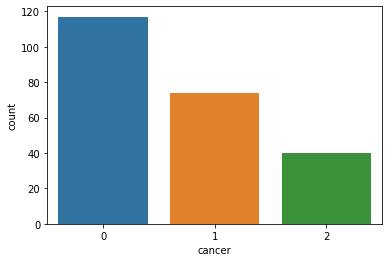

In [60]:

filterd_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_133_genes_data.csv'
network_features = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\patient_net_features.csv'

features_df = pd.read_csv(network_features)

genes_df = pd.read_csv(filterd_data)
df = genes_df.drop(columns = ['Hugo_ID'])
cancer_types =  [0]*117+[1]*74+[2]*40
print(len(cancer_types))
# sns.countplot(x = 'Hugo_ID', data=df)
df = df.T
# df['degree'] = list(features_df['degree'])
# df['clustering_coef'] = list(features_df['clustering_coef'])
# df['betweenness'] = list(features_df['betweenness'])
# df['eigenvector'] = list(features_df['eigenvector'])
# df['closeness'] = list(features_df['closeness'])
df['cancer'] = cancer_types
# print(df)

sns.countplot(x = 'cancer', data=df)


In [65]:

# class2idx = {
#     0:0,
#     1:1,
#     2:2
# }
# idx2class = {v: k for k, v in class2idx.items()}
# df['cancer'].replace(class2idx, inplace=True)
# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]
# print(X,y)
# # Split train into train-val
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=21)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_train, y_train = np.array(X_train), np.array(y_train)
# X_val, y_val = np.array(X_val), np.array(y_val)
# print("Train set datapoints: "+str(len(X_train)))
# print("Validation set datapoints: "+str(len(X_val)))
# def get_class_distribution(obj):
#     count_dict = {
#         "LN": 0,
#         "Bone": 0,
#         "Liver": 0
#     } 
#     for i in obj:
#         if i == 0: 
#             count_dict['LN'] += 1
#         elif i == 1: 
#             count_dict['Bone'] += 1
#         elif i == 2: 
#             count_dict['Liver'] += 1          
#         else:
#             print("Check classes.")          
#     return count_dict
# ax = sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(),\
#             x = "variable", y="value")
# ax.set(xlabel="Cancer type", ylabel = "Cases number", title="Class Distribution in Train Set")
# plt.show(ax)
# ax2 = sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), \
#             x = "variable", y="value")
# ax2.set(xlabel="Cancer type", ylabel = "Cases number",title="Class Distribution in Validation Set")
# plt.show(ax2)

In [88]:


class2idx = {
    0:0,
    1:1,
    2:2
}

idx2class = {v: k for k, v in class2idx.items()}

df['cancer'].replace(class2idx, inplace=True)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
# print(X,y)

model = XGBClassifier()
# kfold = KFold(n_splits=10,shuffle=True)

results = cross_val_score(model, X, y, cv=10)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)


Accuracy: 93.50% (4.46%)
[[115   2   0]
 [  6  68   0]
 [  7   0  33]]


Feature: 0, Score: 0.01474
Feature: 1, Score: 0.00102
Feature: 2, Score: 0.02014
Feature: 3, Score: 0.00156
Feature: 4, Score: 0.01122
Feature: 5, Score: 0.00173
Feature: 6, Score: 0.00157
Feature: 7, Score: 0.01837
Feature: 8, Score: 0.00048
Feature: 9, Score: 0.00131
Feature: 10, Score: 0.00287
Feature: 11, Score: 0.04201
Feature: 12, Score: 0.00658
Feature: 13, Score: 0.00277
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00999
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00078
Feature: 20, Score: 0.00156
Feature: 21, Score: 0.01174
Feature: 22, Score: 0.01515
Feature: 23, Score: 0.00064
Feature: 24, Score: 0.00252
Feature: 25, Score: 0.00122
Feature: 26, Score: 0.00010
Feature: 27, Score: 0.00556
Feature: 28, Score: 0.02422
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00227
Feature: 31, Score: 0.02053
Feature: 32, Score: 0.19745
Feature: 33, Score: 0.00674
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00033
Fe

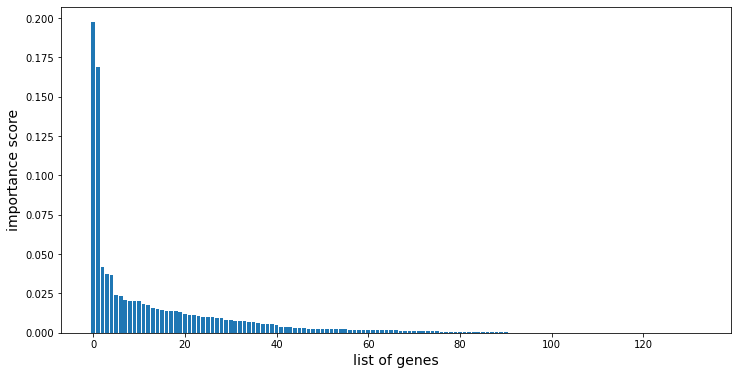

In [89]:
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(12,6))
pyplot.bar([x for x in range(len(importance))], sorted(importance, reverse = True))
pyplot.ylabel('importance score', fontsize=14)
pyplot.xlabel('list of genes', fontsize=14)
pyplot.show()

[115, 236, 310, 1085, 1328, 1594, 1597, 1902, 3121, 4036, 5637, 6100, 7454, 9188, 12331]
[0.02014277, 0.018374829, 0.04200656, 0.015146018, 0.024216356, 0.020526273, 0.19745463, 0.03737781, 0.16880408, 0.020510497, 0.015868604, 0.017415376, 0.0236202, 0.036454737, 0.0210847]


Text(0.5, 0, 'list of genes')

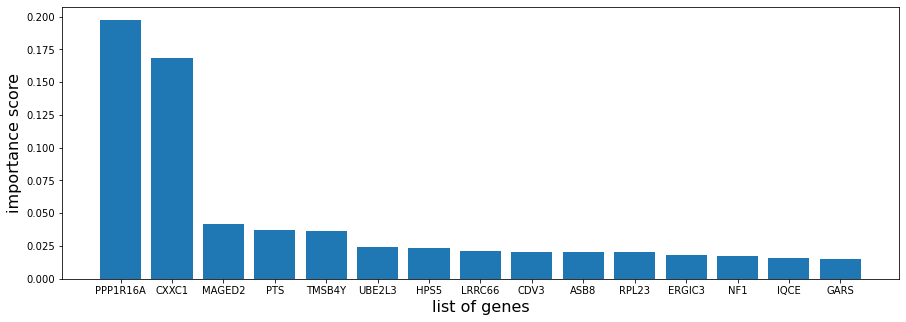

In [91]:
# sorted(importance[:133])
id_symbol_lookup_df = pd.read_csv(id_symbol_lookup_file)
top_genes = []
top_gene_importance = []
importance_threshold = sorted(importance,reverse=True)[15]
for i in range(len(genes_df)):
    if importance[i]>importance_threshold:
        top_genes.append(genes_df['Hugo_ID'][i])
        top_gene_importance.append(importance[i])

print(top_genes)
# id_symbol_lookup_df
# print(list(id_symbol_lookup_df['ID']))
# print(list(id_symbol_lookup_df['Hugo_Symbol']))
ids = list(id_symbol_lookup_df['ID'])
symbols = list(id_symbol_lookup_df['Hugo_Symbol'])
top_genes_symbol = []
for i in top_genes:
    top_genes_symbol.append(symbols[i])
print(top_gene_importance)

top_genes_df = pd.DataFrame({'Hugo_Symbol':top_genes_symbol,'importance':top_gene_importance}) 

top_genes_df = top_genes_df.sort_values(by='importance',axis=0,ascending=[False])

plt.figure(figsize=(15,5))
plt.bar(top_genes_df['Hugo_Symbol'], top_genes_df['importance'])
plt.ylabel('importance score', fontsize=16)
plt.xlabel('list of genes', fontsize=16)

[0 1 1 2 1 0 1 0 2 1 1 2 0 0 2 1 0 0 0 0 0 1 0 0]
[0 1 1 2 1 0 1 0 2 1 1 2 0 0 2 1 0 0 0 0 0 1 0 0]
     0   1   2
0  115   2   0
1    6  68   0
2    7   0  33
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       117
           1       0.97      0.92      0.94        74
           2       1.00      0.82      0.90        40

    accuracy                           0.94       231
   macro avg       0.96      0.91      0.93       231
weighted avg       0.94      0.94      0.93       231



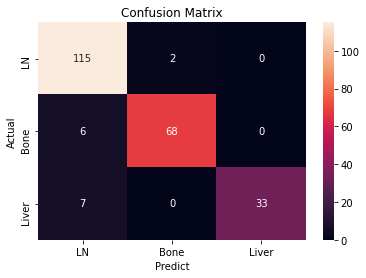

In [64]:

from sklearn.metrics import confusion_matrix, classification_report

print(y_pred_list)
print(y_val)
class2idx = {
    'LN':0,
    'Bone':1,
    'Liver':2
}

idx2class = {v: k for k, v in class2idx.items()}
# print(idx2class)
mat = [[115,2,0],[6,68,0],[7,0,33]]
print(pd.DataFrame(mat))
confusion_matrix_df = pd.DataFrame(mat).rename(columns=idx2class, index=idx2class)

sns.heatmap(confusion_matrix_df, annot=True, fmt=".3g").set(xlabel="Predict", ylabel = "Actual",title="Confusion Matrix")
print(classification_report(y, y_pred))